# Project 3: Building Functions and Visualizing Distribution

In this weeks project, I will walk you through building functions. We will reconstruct the functions from [Chapter 3](https://github.com/jlcatonjr/Learn-Python-for-Stats-and-Econ/blob/master/Textbook/Chapter%203%20-%20Building%20Functions.ipynb). All functions will be arranged in a single block of code.


In this lesson you will use:
    
* Statistical functions that we created in chapter 3

You will learn to:
* Import financial data from *Yahoo Finance* using *pandas_dataread*
* Calculate the daily percent change of each stocks value (from close to close)
* Create a single datframe holding the summary statistics of each variable in a dataframe
* Plot the observed data and the transformed data to observe changes over time
* Create distribtuions for data from each stock downloaded
* Include summary statistics with each plot
* Plot the distributions in a single figure for comparison


## Building Your Own Statistical Functions

Functions are a core element of computing. They allow you to resuse could without excessive copying and pasting. Suppose, for example, that you build a program that is 100 lines of codes. If you want to reuse this program, packaging it as a function will allow you to reuse the code by simply calling the function in a single line. 

As you move through your education and your career, it will be helpful for you to understand how to construct statistical functions. An easy way to get started is to build functions for statistics that provide information about the distribution of data. Below we will rebuild the functions form Chapter 3. We will plot data using scatter plots and bar graphs, attempting to tease out the meaning of variance, covariance, correlation,  skewness, and heteroskedasticity.

### Functions

In [1]:
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_

def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    #lists of even length divided by 2 have reminder 0
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1])
        
    return median_

def mode(list_obj):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in list_obj:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in list_obj:
        # add on to the count of the value for each occurrence in list_obj
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

def variance(list_obj, sample = False):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(list_obj)
    # use n to calculate average of sum squared diffs
    n = len(list_obj)
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in list_obj:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / (n - 1)
    
    return variance_

def SD(list_obj, sample = False):
    # Standard deviation is the square root of variance
    SD_ = variance(list_obj, sample) ** (1/2)
    
    return SD_

def covariance(list_obj1, list_obj2, sample = False):
    # determine the mean of each list
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    # instantiate a variable holding the value of 0; this will be used to 
    # sum the values generated in the for loop below
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    # check list lengths are equal
    if n1 == n2:
        n = n1
        # sum the product of the differences
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        # account for sample by dividing by one less than number of elements in list
        else:
            cov = cov / (n - 1)
        # return covariance
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)
    

def correlation(list_obj1, list_obj2):
    # corr(x,y) = cov(x, y) / (SD(x) * SD(y))
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    for val in list_obj:
        skew += (val - mean_) ** 3
    skew = skew / (n * SD_ **3) if not sample else n * skew / ((n - 1)*(n - 2) * SD_ ** 3)
        
    return skew

def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for val in list_obj:
        kurt += (val - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if sample == False else  n * (n + 1) * kurt / \
    ( (n - 1) * (n - 2) *(n - 3) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    
    return kurt

Now let's create a function that gathers statistics for each variable in a dataframe.

In [2]:
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        # drop any missing observations from dataframe
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        # skip mode. . .         dct[key]["mode"] = mode(val)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)
    return stats_df

For the next exercise, you will need to install pandas_datareader using:
* pip install pandas-datareader 

If you are not an administrator, you may use the command

* pip install pandas-datareader --user

Now that we have built our statistical functions, we will import daily stock data using pandas_datareader. Let's import some of the major tech stocks.

In [3]:
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "FB", "TSLA"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

Now save the closing price data for all four stocks in a single dataframe.

In [4]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1)
close_data

,MSFT,AAPL,FB,TSLA
Date,,,,
2012-01-03,26.770000,14.686786,NaN,5.616000
2012-01-04,27.400000,14.765715,NaN,5.542000
2012-01-05,27.680000,14.929643,NaN,5.424000
2012-01-06,28.110001,15.085714,NaN,5.382000
2012-01-09,27.740000,15.061786,NaN,5.450000
2012-01-10,27.840000,15.115714,NaN,5.524000
2012-01-11,27.719999,15.091071,NaN,5.646000
2012-01-12,28.000000,15.049643,NaN,5.650000
2012-01-13,28.250000,14.993215,NaN,4.558000


Let's plot the data for each stock in a single graph.

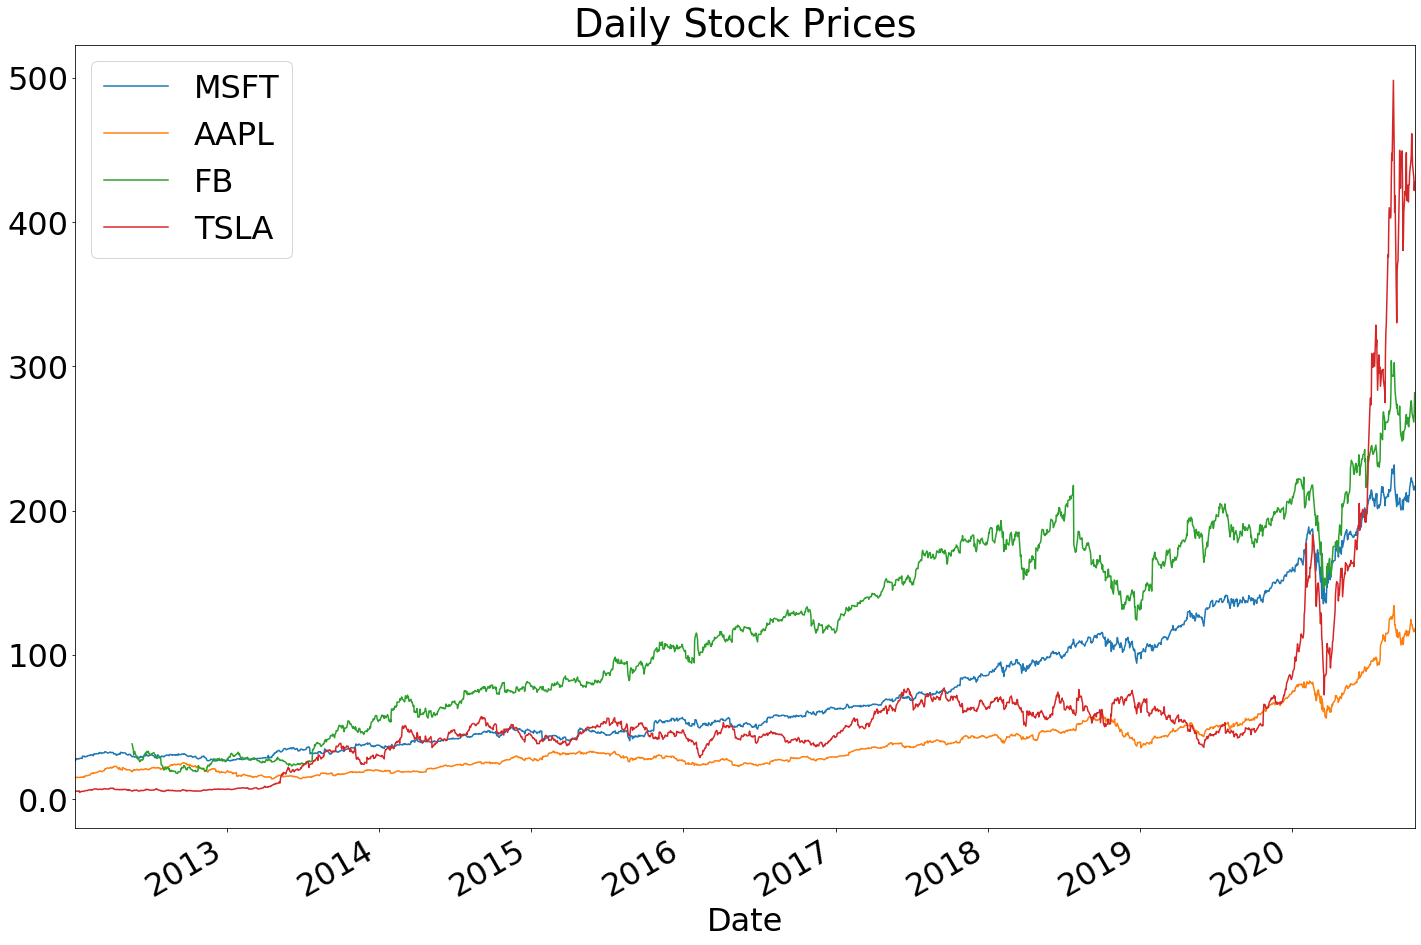

In [5]:
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# set y axis as logged to view changes in proportional terms
# instead of absolute terms
# reset y labels to integer from scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

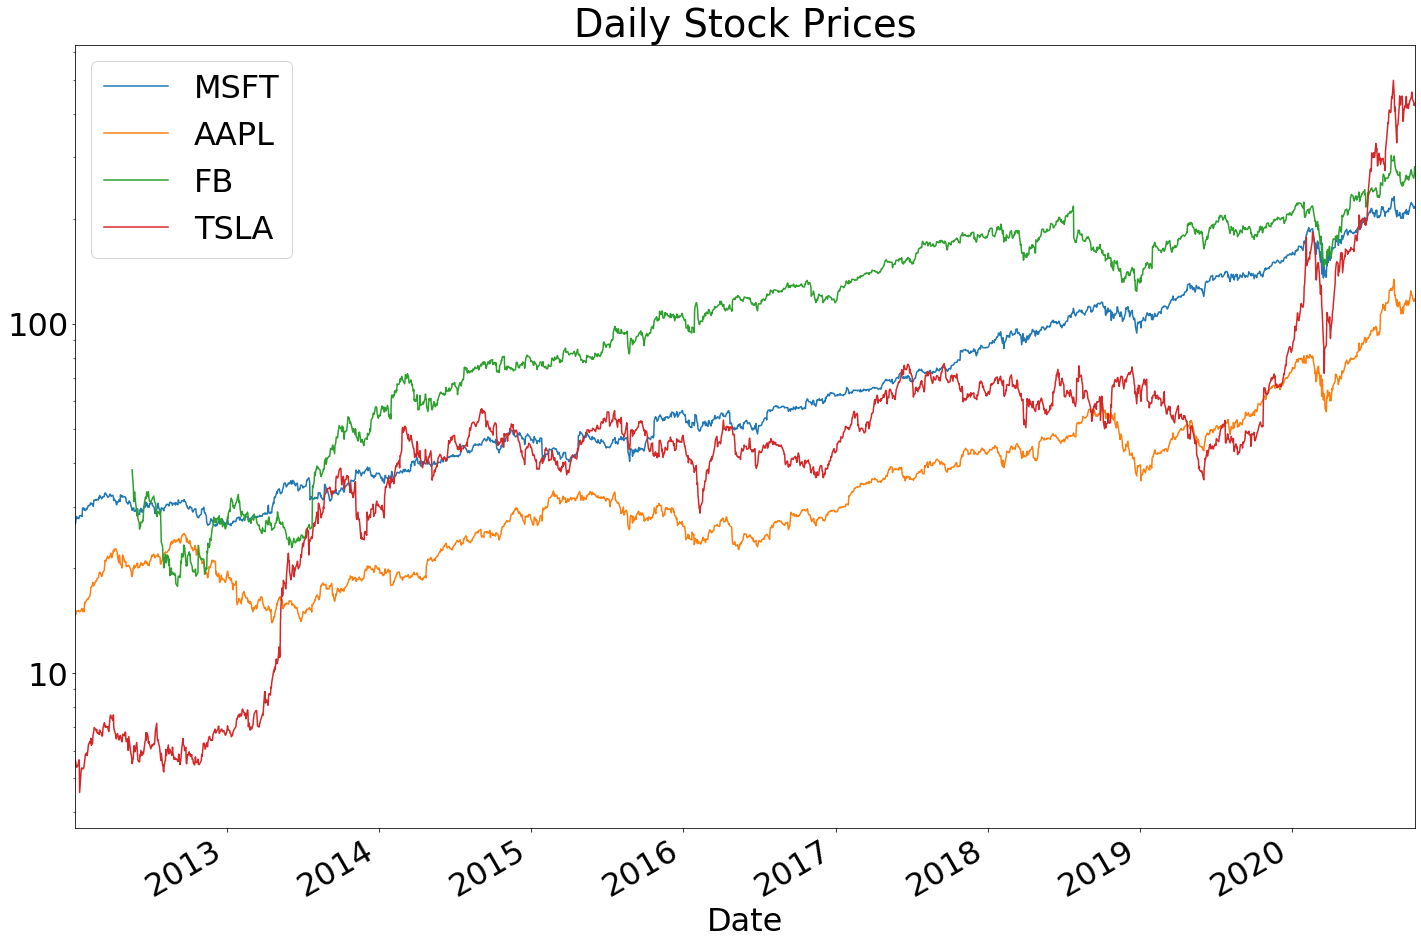

In [6]:
import matplotlib.pyplot as plt

# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# set y axis as logged to view changes in proportional terms
# instead of absolute terms
ax.set_yscale("log")
# reset y labels to integer from scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

As you can see, tech stocks have been generally increasing across the decade. Kudos to you if you bought TSLA stock before 2014!

Let's transform the data so that we observe the distribution of the daily percent change of stock prices. If the efficient markets hypothesis is correct in its strong form, the daily rate of change of prices should be normally distributed. We will see that, over the long-run, the hypothesis is true, but over the short-run, we may find that the tails of distributions are relatively fat.

In [7]:
# pct_change give percent as decimal. Transform to percent as whole number
price_change_data = close_data.pct_change() * 100

As with the untransformed data, it will be useful to view the transformed data in a timeseries plot. Notice how the data reflect periods of tremendous  volatility with other periods reflecting relative stability.

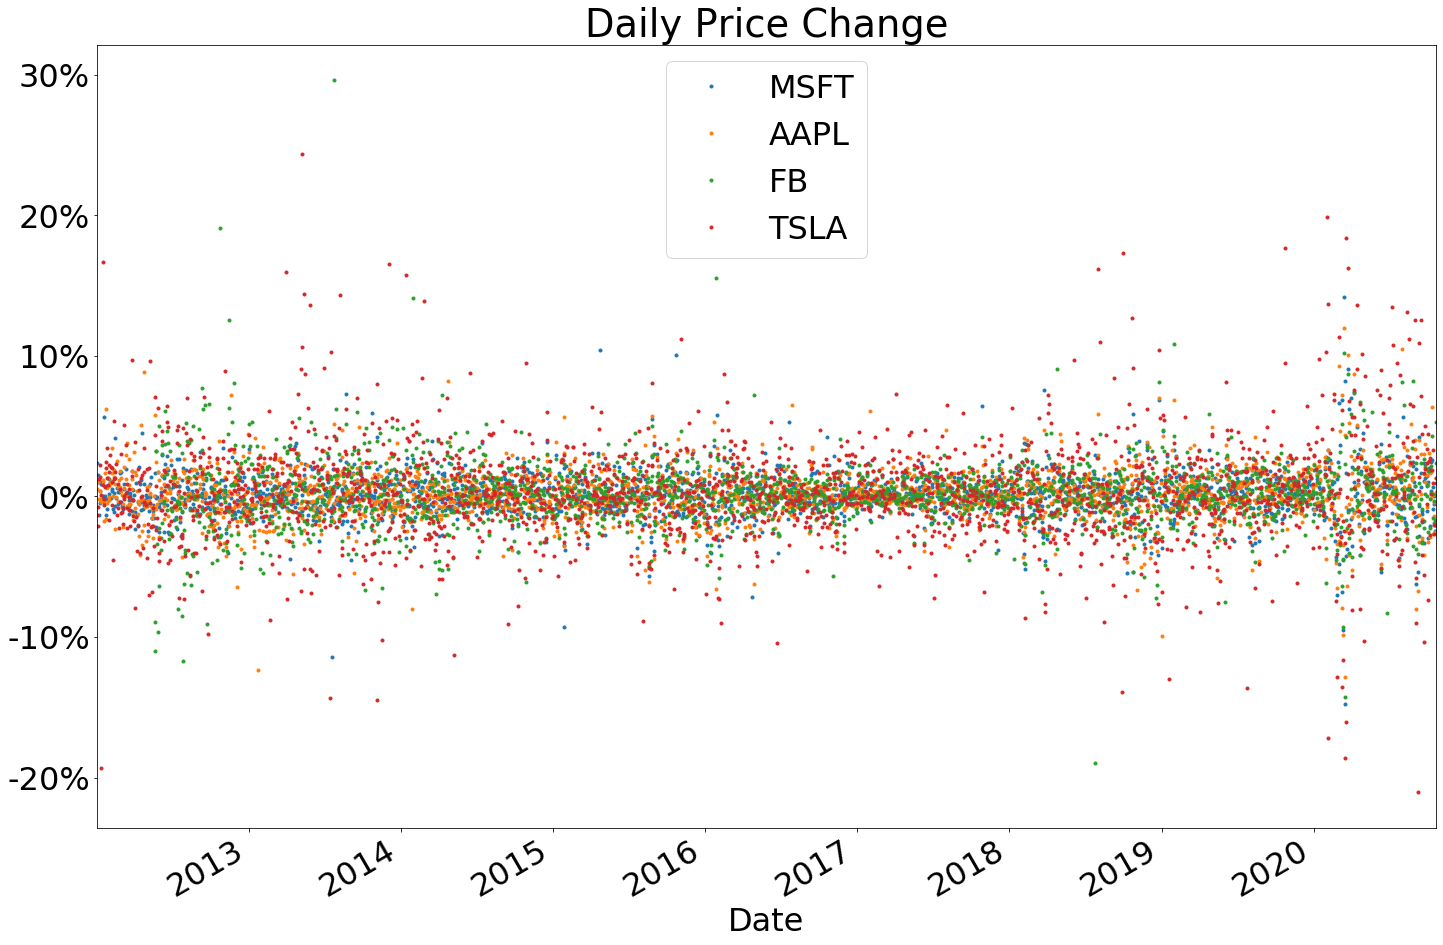

In [8]:
# set default font size
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    # plot as scatter plot over time by setting marker to "." and ls to "" (blank)
    #price_change_data[key].scatter()
    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Daily Price Change")
# set y labels to integer include %
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

It will be helpful to plot the distribution of daily price changes for each stock. After building the initial plot, we will include statistics describing the mean, median, mode, standard deviation, skewness, and kurtosis.

First, let's prepare these statistics in a dataframe using the function we created at the beggining of the lesson.



In [9]:
stats_df = gather_statistics(price_change_data, sample = True)
stats_df

,MSFT,AAPL,FB,TSLA
S.D.,1.635,1.804,2.357,3.509
kurtosis,11.146,6.919,19.233,6.491
mean,0.108,0.110,0.122,0.257
median,0.070,0.089,0.108,0.126
skewness,0.056,-0.129,0.983,0.397
variance,2.675,3.253,5.554,12.313


Next, we will build a histogram using pandas and matplotlib. Luckily, pandas includes a method for building histograms.

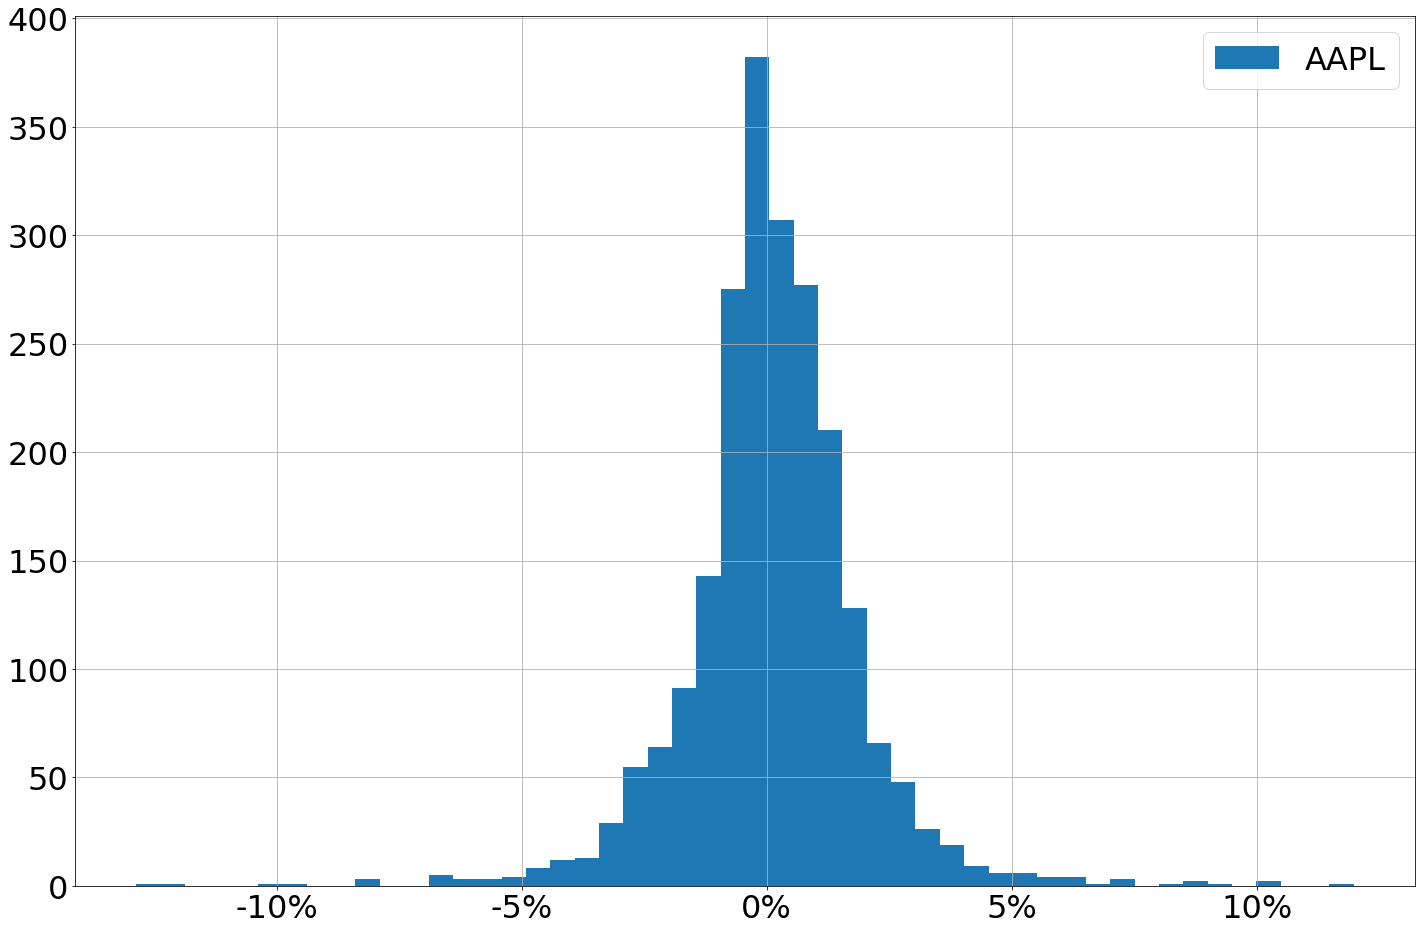

In [10]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL")
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
plt.legend()

Instead of viewing the number of observations for each bin on the y-axis, transform the histogram to a distribution using *density = "true"*. We will also transform the decimal into whole number percentages.

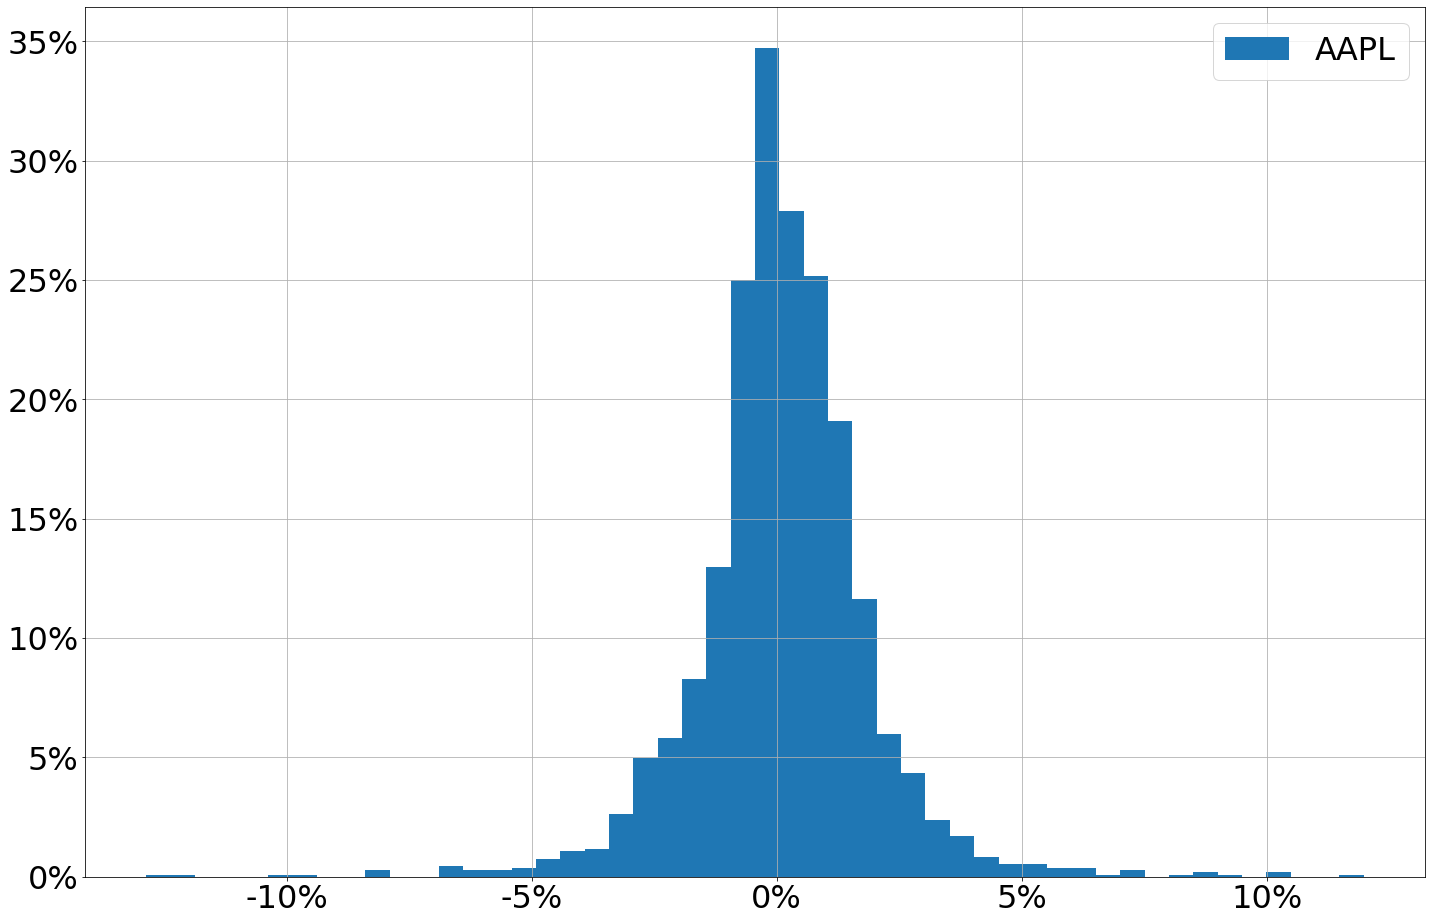

In [11]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["AAPL"].hist(bins = 50, label = "AAPL", density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals]) 
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 

plt.legend()

It will be more interesting if we can compare distributions of these stocks. We can plot these giving each stock its own quadrant.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0937BA3C8>,
      dtype=object)

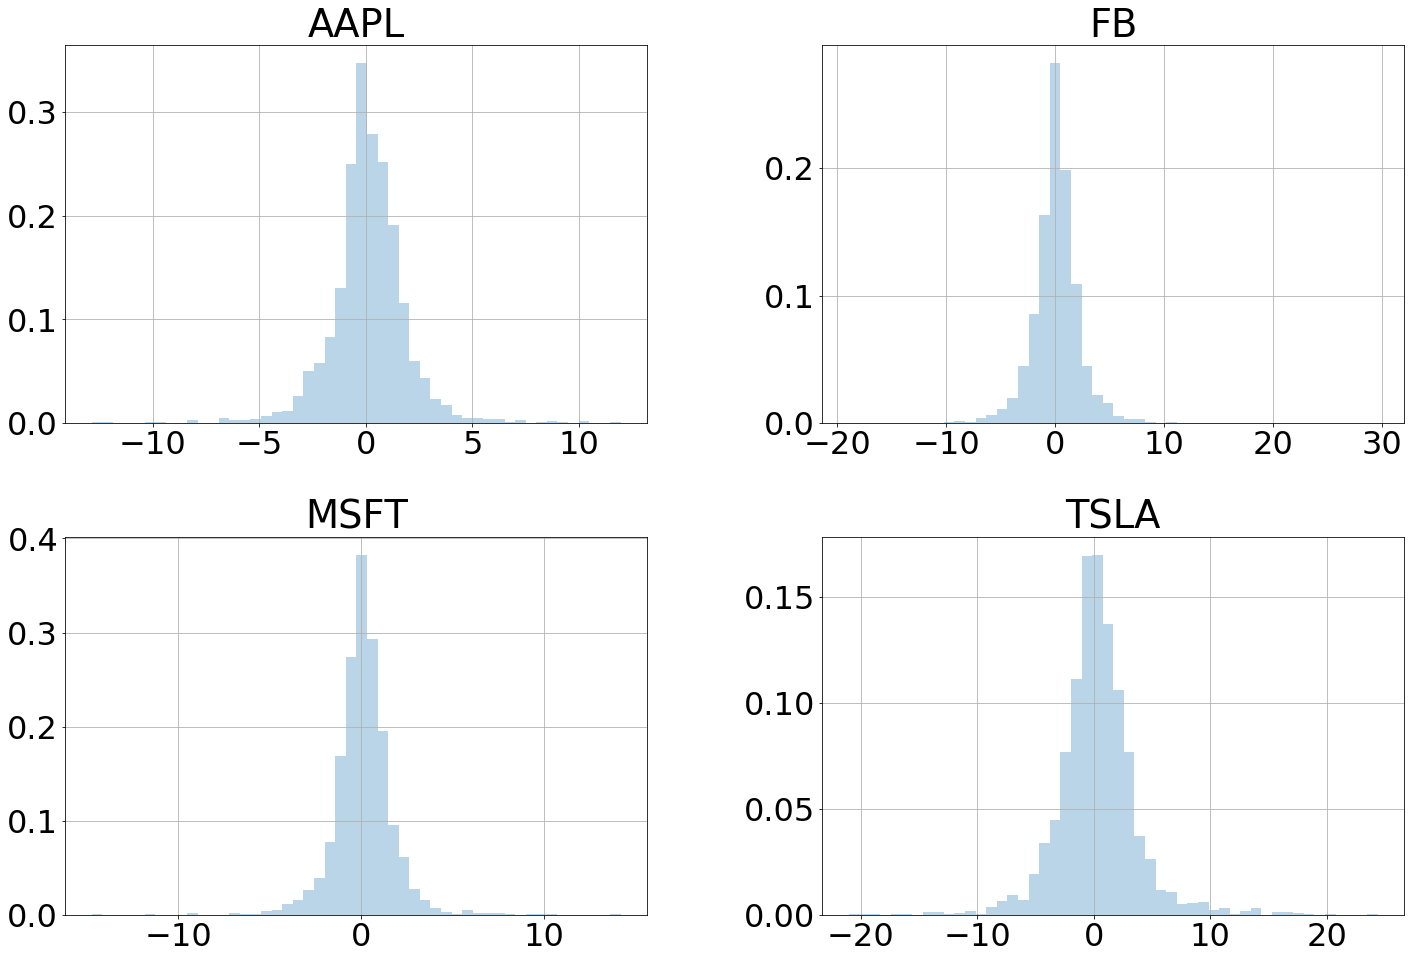

In [12]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

Next, we will calculate statistics for each stock and include these statistics within the plot.

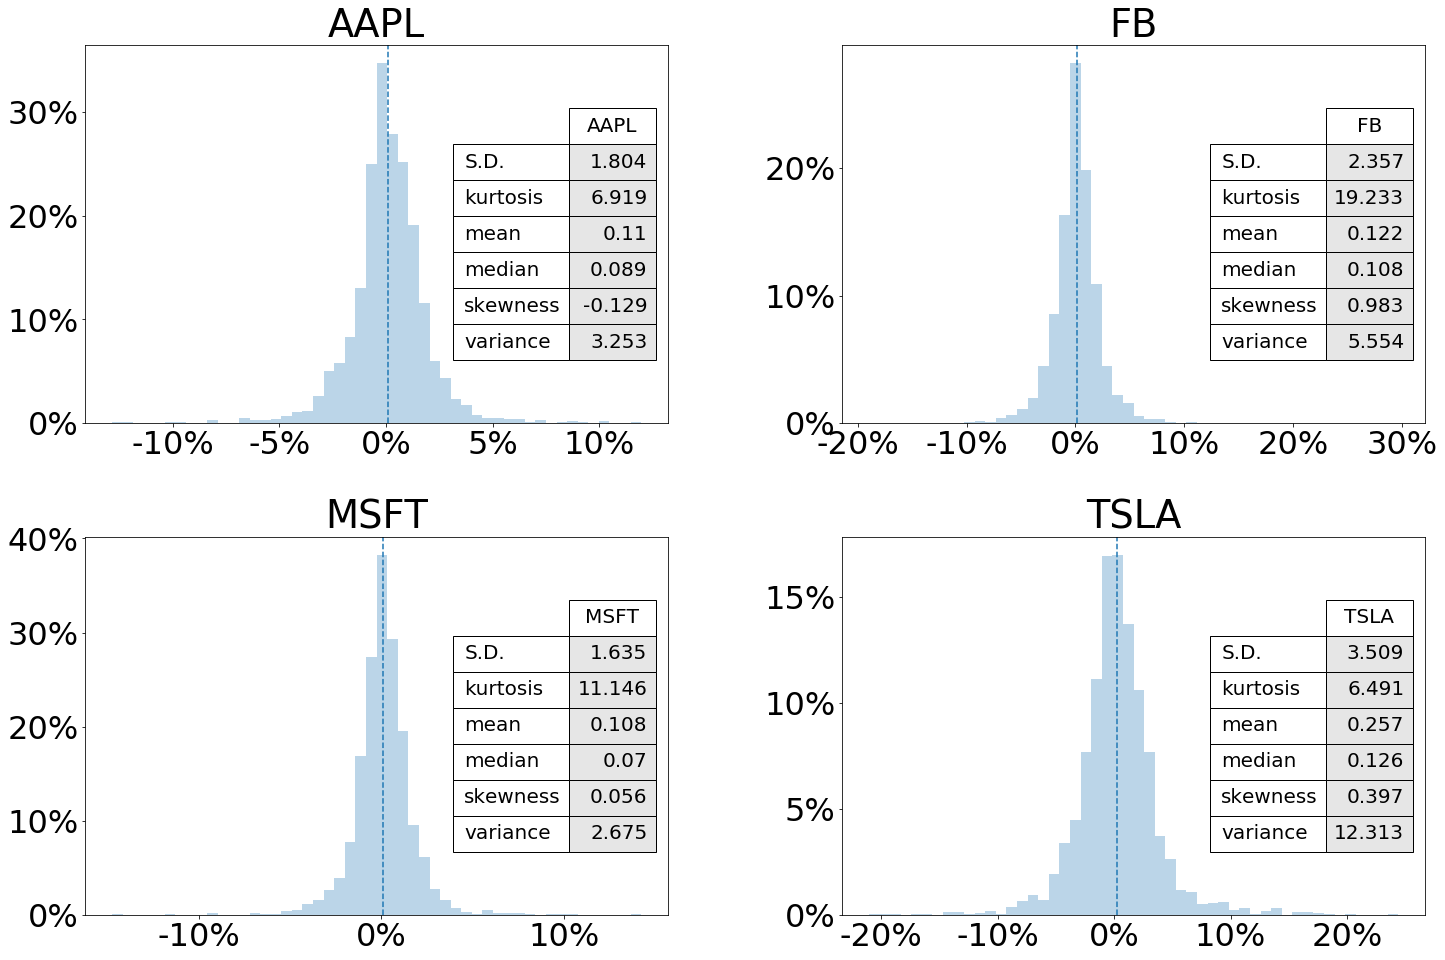

In [13]:
from pandas.plotting import table

fig, ax = plt.subplots(2,2, figsize = (24,16))
#for key in price_change_data:
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

# plot table with summary statistics
for i in range(len(ax)):
    for j in range(len(ax[i])):
        # select hist plot for each stock
        a = ax[i][j]
        # identify stock
        stock = a.get_title()
        # save summary statistics data
        hist_data = stats_df[stock] 
        # plot summary statistics within the histogram plot
        stats =table(a, hist_data, colWidths=[.1], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        stats.scale(1.5,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
        # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        # Turn of grid lines
        a.grid(False)

   
plt.show()

Notice that kurtosis is actually the largest for Facebook, followed by Microsoft. This might seems strange since higher kurtosis values tend to indicate fatter tails for a distribution. So why is it that the tamest distribution in terms of the size of  standard deviation has the second highest kurtosis value? (Hint: look at the role of standard deviation in calculating kurtosis.)

For a more convenient comparison, we can also each histogram transparently on a single plot.

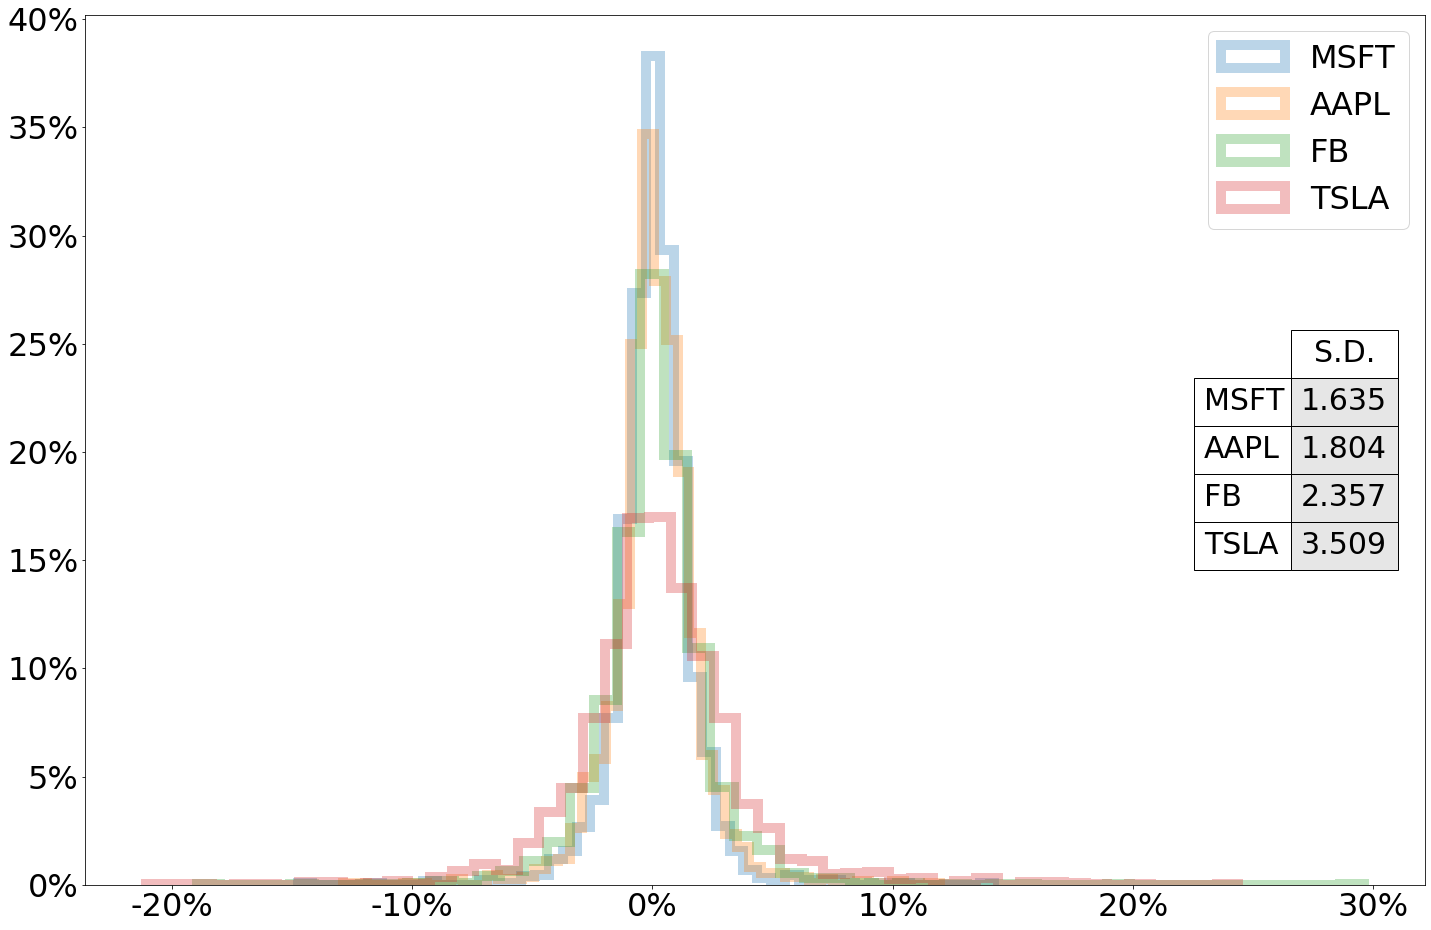

In [14]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", 
                                alpha = .3, label = key, linewidth = 10, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], 
             cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

If you prefer, you can fill the space below the curves to indicate the area under each curve. This makes it difficult to see the "AAPL", but it is especially useful if you would like to compare only 2 or 3 distributions.

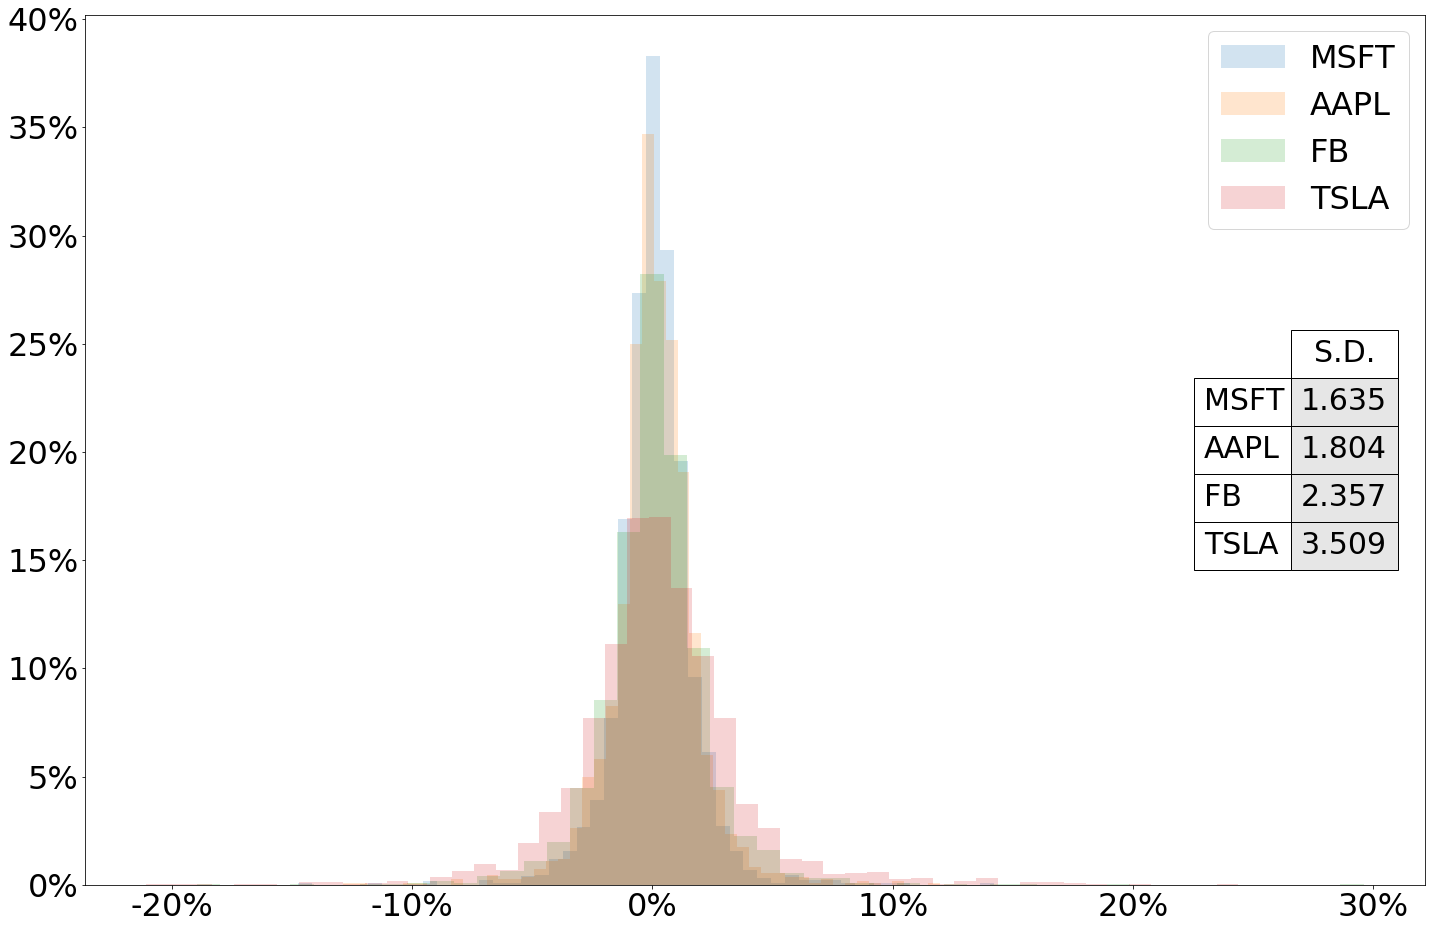

In [15]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, alpha = .2, label = key, 
                                density = True)
# set horizontal axis values as percent
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
# set vertical axis values as percent
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals])
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*4, loc = "center right")
stats.scale(.8,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

The height and standard deviation of each distribution suggests that the order of stocks in terms of volatility, from least to most, are MSFT, AAPL, FB, and TSLA. In particular, TSLA tends to have the most wild swings. Perhaps it is no coincidence that the level of volatility for each stock tends to be negatively correlated with age, although age is not the only factor that matters. TSLA is still in its early growth stage. While its age is comparable with Facebook, the projects in which TSLA is engage are high risk and require a much greater level of coordination, in terms of complexity, than any of the other stocks.

## Conclusion

We have learned how to analyze time series data by 

1. producing summary statistics  
2. transforming the data to measure daily percent change
3. plotting observed and transformed data
4. plotting the distribution of the data

These are all fundamental means of anallyzing data. Following the process presented here is a sure way to make sure that your project is off to a good start!

## Homework

*For ECON 411*

1. Choose 4 stocks of your choice and  create a notebook with the same visualizations. Provide similar explanations in regard to the meaning of statistics and the shape of each stocks distribution.

*For Econ 611*

1. Choose 9 stocks of your choice and  create a notebook with the same visualizations. Provide similar explanations in regard to the meaning of statistics and the shape of each stocks distribution..


$y_i = \beta_i x_i$